In [1]:
import ptc_twiss.madx_configuration as twiss_configuration
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_track.madx_configuration as track_configuration
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import visualization.optics_parameter_visualisation as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_nominal"
script_file_name = "ptc_twiss_script.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_configuration.TwissConfiguration(path_to_script, s)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [44]:
x_mean = 0
sigma_x = 0
theta_x_mean = 140e-6
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
xa_mean = 75e-6
sigma_xa = 75e-6
pt_mean = -0.1
sigma_pt = 0

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
xa_resolution = 11
pt_resolution = 1

grid_configuration_120 = buc.GridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                            xa_mean, sigma_xa, xa_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "

In [45]:
title_sufix = "2017 nominal; " + r"$\theta_x$=140$\mu$rad; $\xi$=-0.1"
transporter1 = "ptc_twiss; madx 5.05.02"

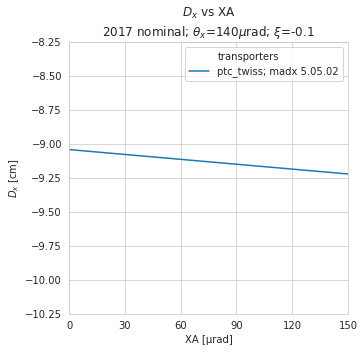

In [46]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_x, twiss_configuration)
}

axes = plotter.plot_optical_functions(grid_configuration_120, optical_functions, "crossing angle", "D x", title_sufix)
axes.set_ylim(-10.25, -8.25)
axes.set_xticks(range(0, 151, 30))

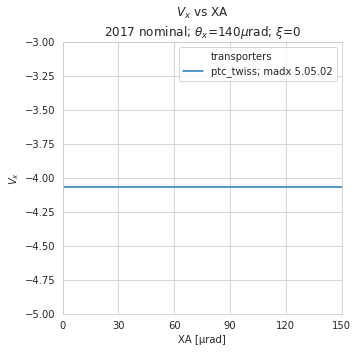

In [32]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_v_x, twiss_configuration),
#     transporter2: (track_optics_parameters.compute_v_x, track_configuration)
}

axes = plotter.plot_optical_functions(grid_configuration_120, optical_functions, "crossing angle", "V x", title_sufix)
axes.set_ylim(-5, -3)
axes.set_xticks(range(0, 151, 30))

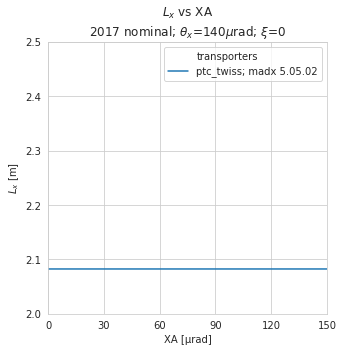

In [42]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_x, twiss_configuration),
#     transporter2: (track_optics_parameters.compute_l_x, track_configuration)
}

axes = plotter.plot_optical_functions(grid_configuration_120, optical_functions, "crossing angle", "L x", title_sufix)
axes.set_ylim(2, 2.5)
axes.set_xticks(range(0, 151, 30))

In [34]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_y, twiss_configuration),
#     transporter2: (track_optics_parameters.compute_l_y, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "theta x", "L y", title_sufix)

NameError: name 'bunch_configuration' is not defined

In [ ]:
import ptc_track.transport_using_optical_functions as transport_function
import importlib
importlib.reload(transport_function)

In [ ]:
segments_by_function = transport_function.transport(track_configuration, bunch_configuration)

In [ ]:
import ptc_track.particles_trajectory_generator as ptg
segments_by_track = ptg.generate_from_range(track_configuration, bunch_configuration)

In [ ]:
sns.scatterplot(x = segments_by_function["end"].T[2], y=segments_by_function["end"].T[0])
sns.scatterplot(x = segments_by_track["end"].T[7], y=segments_by_track["end"].T[2])

In [ ]:
segments_by_function["end"]

In [ ]:
x_error = segments_by_function["end"].T[0] - segments_by_track["end"].T[2]

In [ ]:
sns.scatterplot(x = segments_by_track["end"].T[7], y=x_error)

In [ ]:
x_error_relative = x_error / segments_by_track["end"].T[2]

In [ ]:
sns.scatterplot(x = segments_by_track["end"].T[7][:-4], y=x_error_relative[:-4])